1.Apply knn to the “Surface defects in stainless steel plates” and identify the differences


      X_Minimum  X_Maximum  Y_Minimum  Y_Maximum  Pixels_Areas  X_Perimeter  \
0            42         50     270900     270944           267           17   
1           645        651    2538079    2538108           108           10   
2           829        835    1553913    1553931            71            8   
3           853        860     369370     369415           176           13   
4          1289       1306     498078     498335          2409           60   
...         ...        ...        ...        ...           ...          ...   
1936        249        277     325780     325796           273           54   
1937        144        175     340581     340598           287           44   
1938        145        174     386779     386794           292           40   
1939        137        170     422497     422528           419           97   
1940       1261       1281      87951      87967           103           26   

      Y_Perimeter  Sum_of_Luminosity  Minimum_of_Lu

nKNN accuracy: 0.4832904884318766


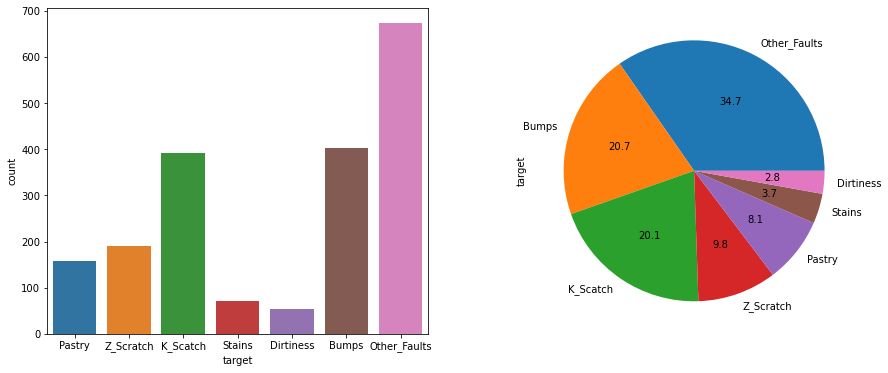

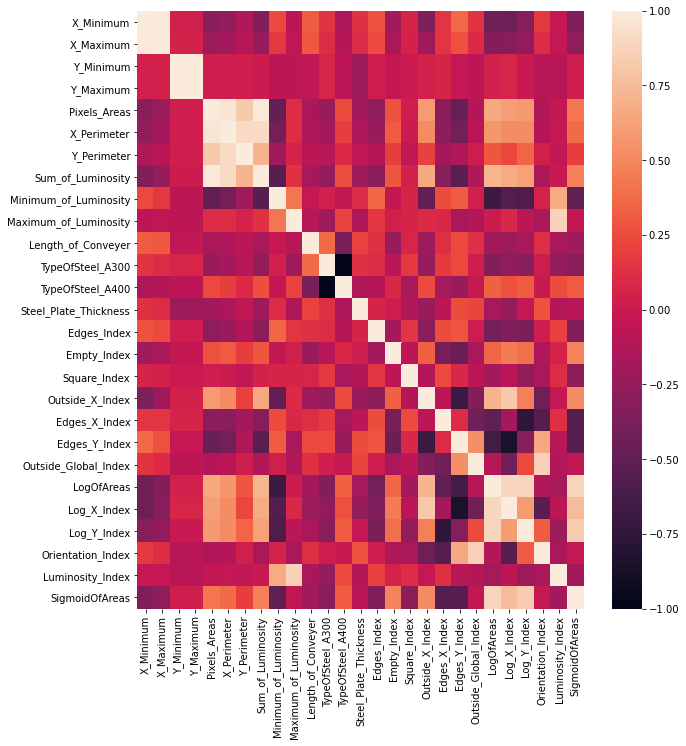

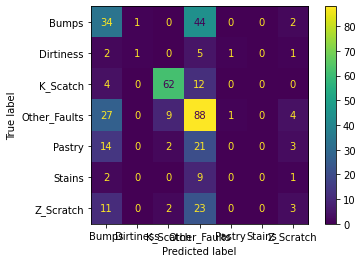

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import plot_confusion_matrix

#Dataframe df
df = pd.read_csv('faults.csv')
#To print data
print(df)
#Size of data
print('n',df.shape)
#To print column names of data
print('n',df.columns)
#To check for datatype and presence of null value for each column
print('n',df.info())
print('n',df.isnull().values.any())

#Last seven columns are type of error classification
label_columns = df.columns.values[-7:]
#Assigning the error classification values to variable targets
targets = (df.iloc[:,-7:]==1).idxmax(1)
print('n',label_columns)
print('n',targets)

#Dropping the 7 error classification columns and retaining only targets
dataset = df.drop(label_columns,axis=1)
#creating a new column 'target' with all classification values
dataset['target']=targets
print('n',dataset)
#Printing count of each type of error
print('n',dataset.target.value_counts())

fig, ax = plt.subplots(1,2,figsize=(15,6))
#Visualising the distribution of each error using histogram and pie chart
sns.countplot(x='target',data=dataset, ax=ax[0])
dataset['target'].value_counts().plot.pie(autopct = '%.1f', ax=ax[1])

#Visualising the correlation among each dataset feature
plt.figure(figsize=(10,11))
sns.heatmap(dataset.corr(),annot=False)

#Dropping features with high correlation to others
dataset=dataset.drop('TypeOfSteel_A400',axis=1)
dataset=dataset.drop('X_Minimum',axis=1)
dataset=dataset.drop('Y_Minimum',axis=1)

#Assigning feature column values to x
x = dataset.iloc[:,0:24]
#Assingning target column values to y 
y = dataset.iloc[:,24]

#Splitting the dataset to training and testing sets
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2, random_state = 0)

#KNN model
knn = KNeighborsClassifier(n_neighbors= 19)
knn.fit(x_train,y_train)
classfier = knn.fit(x_train,y_train)
print("nKNN accuracy:",knn.score(x_test,y_test))
plot_confusion_matrix(classfier,x_test,y_test,labels=None, sample_weight=None, normalize=None)
plt.show()

2.What are the pros and cons of knn

Pros of KNN:-
1. No Training Period: KNN is called Lazy Learner (Instance based learning). It does not learn anything in the training period. It does not derive any discriminative function from the training data. In other words, there is no training period for it. It stores the training dataset and learns from it only at the time of making real time predictions. This makes the KNN algorithm much faster than other algorithms that require training e.g. SVM, Linear Regression etc.

2. Since the KNN algorithm requires no training before making predictions, new data can be added seamlessly which will not impact the accuracy of the algorithm.

3. KNN is very easy to implement. There are only two parameters required to implement KNN i.e. the value of K and the distance function (e.g. Euclidean or Manhattan etc.)

Cons of KNN:-
1. Does not work well with large dataset: In large datasets, the cost of calculating the distance between the new point and each existing points is huge which degrades the performance of the algorithm.

2. Does not work well with high dimensions: The KNN algorithm doesn't work well with high dimensional data because with large number of dimensions, it becomes difficult for the algorithm to calculate the distance in each dimension.

3. Need feature scaling: We need to do feature scaling (standardization and normalization) before applying KNN algorithm to any dataset. If we don't do so, KNN may generate wrong predictions.

4. Sensitive to noisy data, missing values and outliers: KNN is sensitive to noise in the dataset. We need to manually impute missing values and remove outliers.